In [1]:
import pandas as pd
import numpy as np
from ta import *
snp_df = pd.read_csv('S&P500_technical_indicator_labels.csv')

In [2]:
test_year_dates = ['2018-08-01','2019-08-30']
t1year = ['2017-07-03','2018-07-30']
t5year = ['2013-07-01','2018-07-30']

# train_type should be ['1_year','5_year','all']
def get_recent_test_train(df, train_type):
    try:
        df = df.set_index('Date')
    except:
        pass
    test = df.loc[test_year_dates[0]:test_year_dates[1]]
    if train_type == '1_year':
        train = df.loc[t1year[0]:t1year[1]]
    elif train_type == '5_year':
        train = df.loc[t5year[0]:t5year[1]]
    elif train_type == 'all':
        train = df.loc[:t1year[1]]
    else:
        print("train_type must be one of the following:")
        print('1_year, ','5_year, ','or all')
        return(0,0)
    return(train, test)

In [3]:
!pip install sklearn

In [4]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_1year_snp, test_data_1year_snp = get_recent_test_train(snp_df, '1_year')
X_train_1year_snp = train_data_1year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_snp = test_data_1year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_snp = train_data_1year_snp[['snp_labels']]
y_test_1year_snp = test_data_1year_snp[['snp_labels']]

In [5]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_1year_snp, y_train_1year_snp)

y_predict = model.predict(X_test_1year_snp)

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_1year_snp, y_predict)

0.42857142857142855

In [7]:
tree.export_graphviz(model, out_file='1year_snp_tree.dot', feature_names=X.columns)

In [8]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('1year_snp_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

/bin/sh: 1: pip3: not found


<Figure size 640x480 with 1 Axes>

In [9]:
import pydot

(graph,) = pydot.graph_from_dot_file('1year_snp_tree.dot')
graph.write_png('1year_snp_decisiontree.png')

In [10]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_5year_snp, test_data_5year_snp = get_recent_test_train(snp_df, '5_year')
X_train_5year_snp = train_data_5year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_snp = test_data_5year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_snp = train_data_5year_snp[['snp_labels']]
y_test_5year_snp = test_data_5year_snp[['snp_labels']]

In [11]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_5year_snp, y_train_5year_snp)

y_predict = model.predict(X_test_5year_snp)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5year_snp, y_predict)

0.45054945054945056

In [13]:
tree.export_graphviz(model, out_file='5year_snp_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


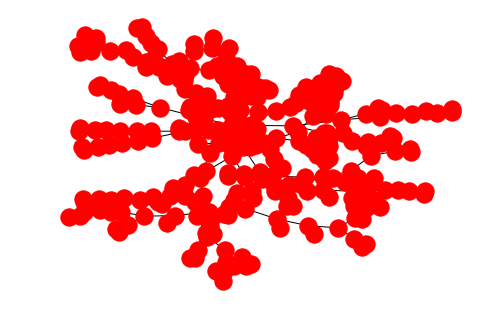

In [14]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('5year_snp_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [15]:
import pydot

(graph,) = pydot.graph_from_dot_file('5year_snp_tree.dot')
graph.write_png('5year_snp_decisiontree.png')

In [16]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_all_snp, test_data_all_snp = get_recent_test_train(snp_df, 'all')
X_train_all_snp = train_data_all_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_snp = test_data_all_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_snp = train_data_all_snp[['snp_labels']]
y_test_all_snp = test_data_all_snp[['snp_labels']]

In [17]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_all_snp, y_train_all_snp)

y_predict = model.predict(X_test_all_snp)

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_all_snp, y_predict)

0.47985347985347987

In [19]:
tree.export_graphviz(model, out_file='all_snp_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


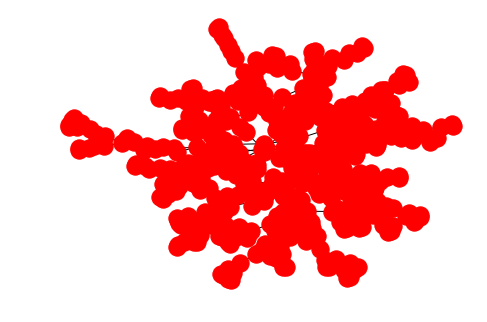

In [20]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('all_snp_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [21]:
import pydot

(graph,) = pydot.graph_from_dot_file('all_snp_tree.dot')
graph.write_png('all_snp_decisiontree.png')

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_1year_snp, test_data_1year_snp = get_recent_test_train(snp_df, '1_year')
X_train_1year_snp = train_data_1year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_1year_snp = test_data_1year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_1year_snp = train_data_1year_snp[['snp_labels']]
y_test_1year_snp = test_data_1year_snp[['snp_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_1year_snp, y_train_1year_snp.values.ravel())
y_pred = model.predict(X_test_1year_snp)

print(confusion_matrix(y_test_1year_snp,y_pred))
print(classification_report(y_test_1year_snp,y_pred))
print(accuracy_score(y_test_1year_snp, y_pred))

[[ 18   4  90]
 [  0   3  21]
 [ 26   6 105]]
              precision    recall  f1-score   support

        -1.0       0.41      0.16      0.23       112
         0.0       0.23      0.12      0.16        24
         1.0       0.49      0.77      0.59       137

   micro avg       0.46      0.46      0.46       273
   macro avg       0.38      0.35      0.33       273
weighted avg       0.43      0.46      0.41       273

0.46153846153846156


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_5year_snp, test_data_5year_snp = get_recent_test_train(snp_df, '5_year')
X_train_5year_snp = train_data_5year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_5year_snp = test_data_5year_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_5year_snp = train_data_5year_snp[['snp_labels']]
y_test_5year_snp = test_data_5year_snp[['snp_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_5year_snp, y_train_5year_snp.values.ravel())
y_pred = model.predict(X_test_5year_snp)

print(confusion_matrix(y_test_5year_snp,y_pred))
print(classification_report(y_test_5year_snp,y_pred))
print(accuracy_score(y_test_5year_snp, y_pred))

[[ 19   5  88]
 [  6   1  17]
 [ 31   6 100]]
              precision    recall  f1-score   support

        -1.0       0.34      0.17      0.23       112
         0.0       0.08      0.04      0.06        24
         1.0       0.49      0.73      0.58       137

   micro avg       0.44      0.44      0.44       273
   macro avg       0.30      0.31      0.29       273
weighted avg       0.39      0.44      0.39       273

0.43956043956043955


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_all_snp, test_data_all_snp = get_recent_test_train(snp_df, 'all')
X_train_all_snp = train_data_all_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_all_snp = test_data_all_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_all_snp = train_data_all_snp[['snp_labels']]
y_test_all_snp = test_data_all_snp[['snp_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_all_snp, y_train_all_snp.values.ravel())
y_pred = model.predict(X_test_all_snp)

print(confusion_matrix(y_test_all_snp,y_pred))
print(classification_report(y_test_all_snp,y_pred))
print(accuracy_score(y_test_all_snp, y_pred))

[[ 10   0 102]
 [  2   0  22]
 [ 16   2 119]]
              precision    recall  f1-score   support

        -1.0       0.36      0.09      0.14       112
         0.0       0.00      0.00      0.00        24
         1.0       0.49      0.87      0.63       137

   micro avg       0.47      0.47      0.47       273
   macro avg       0.28      0.32      0.26       273
weighted avg       0.39      0.47      0.37       273

0.4725274725274725


In [25]:
b1 = ['1991-04-01','1993-04-30']
b2 = ['2001-12-03','2003-12-31']
b3 = ['2009-07-01','2011-07-29']

def get_boom_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[b1[0]:b1[1]],df.loc[b2[0]:b2[1]]])
    test = df.loc[b3[0]:b3[1]]
    return(train, test)

In [26]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_boom_snp, test_data_boom_snp = get_boom_test_train(snp_df)
X_train_boom_snp = train_data_boom_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_snp = test_data_boom_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_snp = train_data_boom_snp[['snp_labels']]
y_test_boom_snp = test_data_boom_snp[['snp_labels']]

In [27]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_boom_snp, y_train_boom_snp)

y_predict = model.predict(X_test_boom_snp)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_boom_snp, y_predict)

0.37714285714285717

In [29]:
tree.export_graphviz(model, out_file='boom_snp_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


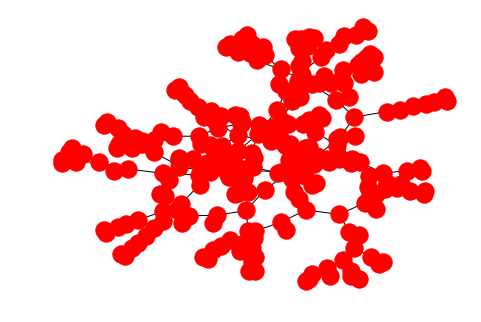

In [30]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('boom_snp_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [31]:
import pydot

(graph,) = pydot.graph_from_dot_file('boom_snp_tree.dot')
graph.write_png('boom_snp_decisiontree.png')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_boom_snp, test_data_boom_snp = get_boom_test_train(snp_df)
X_train_boom_snp = train_data_boom_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_boom_snp = test_data_boom_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_boom_snp = train_data_boom_snp[['snp_labels']]
y_test_boom_snp = test_data_boom_snp[['snp_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_boom_snp, y_train_boom_snp.values.ravel())
y_pred = model.predict(X_test_boom_snp)

print(confusion_matrix(y_test_boom_snp,y_pred))
print(classification_report(y_test_boom_snp,y_pred))
print(accuracy_score(y_test_boom_snp, y_pred))

[[121   2  66]
 [ 41   1  16]
 [186   8  84]]
              precision    recall  f1-score   support

        -1.0       0.35      0.64      0.45       189
         0.0       0.09      0.02      0.03        58
         1.0       0.51      0.30      0.38       278

   micro avg       0.39      0.39      0.39       525
   macro avg       0.31      0.32      0.29       525
weighted avg       0.40      0.39      0.37       525

0.3923809523809524


In [33]:
r1 = ['1989-03-01','1991-03-28']
r2 = ['1999-11-01','2001-11-30']
r3 = ['2007-06-01','2009-06-30']

def get_recession_test_train(df):
    try:
        df = df.set_index('Date')
    except:
        pass
    train = pd.concat([df.loc[r1[0]:r1[1]],df.loc[r2[0]:r2[1]]])
    test = df.loc[r3[0]:r3[1]]
    return(train, test)

In [34]:
X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_recession_snp, test_data_recession_snp = get_recession_test_train(snp_df)
X_train_recession_snp = train_data_recession_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_snp = test_data_recession_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_snp = train_data_recession_snp[['snp_labels']]
y_test_recession_snp = test_data_recession_snp[['snp_labels']]

In [35]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train_recession_snp, y_train_recession_snp)

y_predict = model.predict(X_test_recession_snp)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_recession_snp, y_predict)

0.42857142857142855

In [37]:
tree.export_graphviz(model, out_file='recession_snp_tree.dot', feature_names=X.columns)

/bin/sh: 1: pip3: not found


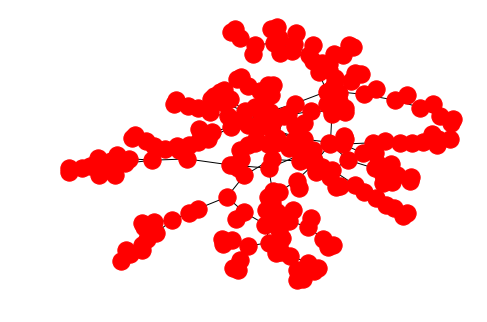

In [38]:
# from subprocess import call
# !pip install pydot
# call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])
!pip3 install pygraphviz
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('recession_snp_tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

In [39]:
import pydot

(graph,) = pydot.graph_from_dot_file('recession_snp_tree.dot')
graph.write_png('recession_snp_decisiontree.png')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = snp_df[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y = snp_df['snp_labels']
train_data_recession_snp, test_data_recession_snp = get_recession_test_train(snp_df)
X_train_recession_snp = train_data_recession_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
X_test_recession_snp = test_data_recession_snp[['keltner_indicator', 'bbands_indicator', 'ichimoku_label','macd_indicator', 'rsi_label', 'ease_label', 'cmf_label', 'stochastic_label']]
y_train_recession_snp = train_data_recession_snp[['snp_labels']]
y_test_recession_snp = test_data_recession_snp[['snp_labels']]

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_recession_snp, y_train_recession_snp.values.ravel())
y_pred = model.predict(X_test_recession_snp)

print(confusion_matrix(y_test_recession_snp,y_pred))
print(classification_report(y_test_recession_snp,y_pred))
print(accuracy_score(y_test_recession_snp, y_pred))

[[120   4 127]
 [ 40   4  64]
 [ 59   3 104]]
              precision    recall  f1-score   support

        -1.0       0.55      0.48      0.51       251
         0.0       0.36      0.04      0.07       108
         1.0       0.35      0.63      0.45       166

   micro avg       0.43      0.43      0.43       525
   macro avg       0.42      0.38      0.34       525
weighted avg       0.45      0.43      0.40       525

0.4342857142857143
